In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [95]:
df = pd.read_csv('data/DSI_kickstarterscrape_dataset.csv', encoding='ISO-8859-1') # Loading in the dataset
df.head() # seeing the dataset

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [96]:
np.sum(df.isnull(), axis = 0) # seeing the number of missing values

project id              0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

In [97]:
df.dropna(inplace= True) # dropping all rows with missing values

In [98]:
np.sum(df.isnull(), axis = 0) # checking there are no missing values

project id           0
name                 0
url                  0
category             0
subcategory          0
location             0
status               0
goal                 0
pledged              0
funded percentage    0
backers              0
funded date          0
levels               0
reward levels        0
updates              0
comments             0
duration             0
dtype: int64

In [99]:
df = df[df['location'].str.match(r".*, [A-Z]{2}$")] # making sure there are only US locations as they end in , XX

In [100]:
df.drop(columns = ['name', 'url', 'project id'], inplace= True) # droping irrelvant columns

In [101]:
df.nunique() # to see which values I should one-hot encode

category                14
subcategory             51
location              4033
status                   5
goal                  1711
pledged              10424
funded percentage    20455
backers                933
funded date          37969
levels                  61
reward levels        26332
updates                 82
comments               298
duration              5641
dtype: int64

In [102]:
df['state'] = df['location'].str.extract(r", ([A-Z]{2})$") # creating a new state column by extracting the states

In [103]:
df.nunique() # state has a lot less unique values so it is okay to one-hot encode it

category                14
subcategory             51
location              4033
status                   5
goal                  1711
pledged              10424
funded percentage    20455
backers                933
funded date          37969
levels                  61
reward levels        26332
updates                 82
comments               298
duration              5641
state                   51
dtype: int64

In [104]:
df.drop(columns = ['location'], inplace= True) # only going to use the state

In [105]:
df = pd.get_dummies(df, columns=['category', 'subcategory', 'state'], drop_first=True, dtype=int) # one-hot encoding all these columns

In [106]:
df.shape

(42217, 124)

In [107]:
df['funded date'] = pd.to_datetime(df['funded date'], errors='coerce') # turns the rows into date time objects
df['funded_month'] = df['funded date'].dt.month # We can now just extract the month
df.drop(columns = ['funded date'], inplace= True) # drop this column as it is no longer needed

In [108]:
df.head()

,status,goal,pledged,funded percentage,backers,levels,reward levels,updates,comments,duration,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,funded_month
0,successful,10500.0,11545.0,1.099524,66,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,...,0,0,0,0,0,0,0,0,0,8
1,failed,4000.0,20.0,0.005000,2,5,"$1,$5,$10,$25,$50",6,0,47.18,...,0,0,0,0,0,0,0,0,0,8
2,live,20000.0,56.0,0.002800,3,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,...,0,0,0,0,0,0,0,0,0,6
3,successful,6000.0,6535.0,1.089167,100,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,...,0,0,0,0,0,0,0,0,0,4
4,failed,3500.0,0.0,0.000000,0,6,"$10,$25,$50,$100,$150,$250",2,0,30.00,...,0,0,0,0,0,0,0,0,0,6


In [109]:
df[['goal', 'pledged', 'backers', 'duration']].describe(percentiles=[0.01, 0.99]) # just looking at the distributions to see if I need to drop any outliers

,goal,pledged,backers,duration
count,4.221700e+04,4.221700e+04,42217.000000,42217.000000
mean,1.206390e+04,4.991992e+03,69.500272,39.605644
std,1.966725e+05,5.906050e+04,710.799225,17.073243
min,5.000000e-01,0.000000e+00,0.000000,1.000000
1%,2.000000e+02,0.000000e+00,0.000000,10.000000
50%,4.000000e+03,1.285000e+03,23.000000,31.520000
99%,1.000000e+05,4.586740e+04,604.840000,90.040000
max,2.147484e+07,1.026684e+07,87142.000000,91.960000


In [110]:
df['goal'] = stats.mstats.winsorize(df['goal'], limits=[0.01, 0.01]) # removing the outliers
df['pledged'] = stats.mstats.winsorize(df['pledged'], limits=[0.01, 0.01])
df['backers'] = stats.mstats.winsorize(df['backers'], limits=[0.01, 0.01])
df['duration'] = stats.mstats.winsorize(df['duration'], limits=[0.01, 0.01])


In [111]:
df[['goal', 'pledged', 'backers', 'duration']].describe(percentiles=[0.01, 0.99]) # seeing the difference

,goal,pledged,backers,duration
count,42217.000000,42217.000000,42217.000000,42217.000000
mean,8735.367688,3763.616600,51.592297,39.627621
std,15028.269457,6935.283863,89.385245,16.991544
min,200.000000,0.000000,0.000000,10.000000
1%,200.000000,0.000000,0.000000,10.000000
50%,4000.000000,1285.000000,23.000000,31.520000
99%,100000.000000,45867.400000,604.840000,90.040000
max,100000.000000,45901.000000,605.000000,90.040000


In [112]:
df.shape

(42217, 124)

In [113]:
df.drop(columns =["reward levels"], inplace=True)

In [114]:
df["status"].unique()


array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [115]:
df.shape

(42217, 123)

In [116]:
df = df[df['status'] != 'live'] 
df = df[df['status'] != 'canceled'] 
df = df[df['status'] != 'suspended']  # delete everything after this for model testing 

In [117]:
df.shape

(38463, 123)

In [118]:
df.head(10)

,status,goal,pledged,funded percentage,backers,levels,updates,comments,duration,category_Comics,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,funded_month
0,successful,10500.0,11545.0,1.099524,66,7,10,2,30.00,0,...,0,0,0,0,0,0,0,0,0,8
1,failed,4000.0,20.0,0.005000,2,5,6,0,47.18,0,...,0,0,0,0,0,0,0,0,0,8
3,successful,6000.0,6535.0,1.089167,100,13,4,0,32.22,0,...,0,0,0,0,0,0,0,0,0,4
4,failed,3500.0,0.0,0.000000,0,6,2,0,30.00,0,...,0,0,0,0,0,0,0,0,0,6
5,successful,3500.0,3582.0,1.023331,39,7,8,0,21.43,0,...,0,0,0,0,0,0,0,0,0,6
6,failed,1000.0,280.0,0.280000,8,5,0,0,30.00,0,...,1,0,0,0,0,0,0,0,0,2
7,successful,2000.0,2180.0,1.090000,46,7,13,5,30.00,0,...,0,0,0,0,0,0,0,0,0,12
8,successful,1000.0,1125.0,1.125000,30,12,10,1,67.53,0,...,0,0,0,0,0,0,0,0,0,4
9,successful,7500.0,9836.0,1.311527,255,10,6,5,35.29,0,...,0,0,0,0,0,0,0,0,0,11
12,successful,20000.0,20138.0,1.006911,115,21,8,12,45.04,0,...,0,0,0,0,0,0,0,0,0,12


In [ ]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform

In [119]:
df['status'] = df['status'].map({'successful': 1, 'failed': 0})

In [120]:
y = df['status'] # labeling the target
X = df.drop(columns='status') # feature columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [123]:
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>


In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test.values)

print("Accuracy:", accuracy_score(y_test, y_pred))

/Users/ishveenk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9968801996672213


### EDA

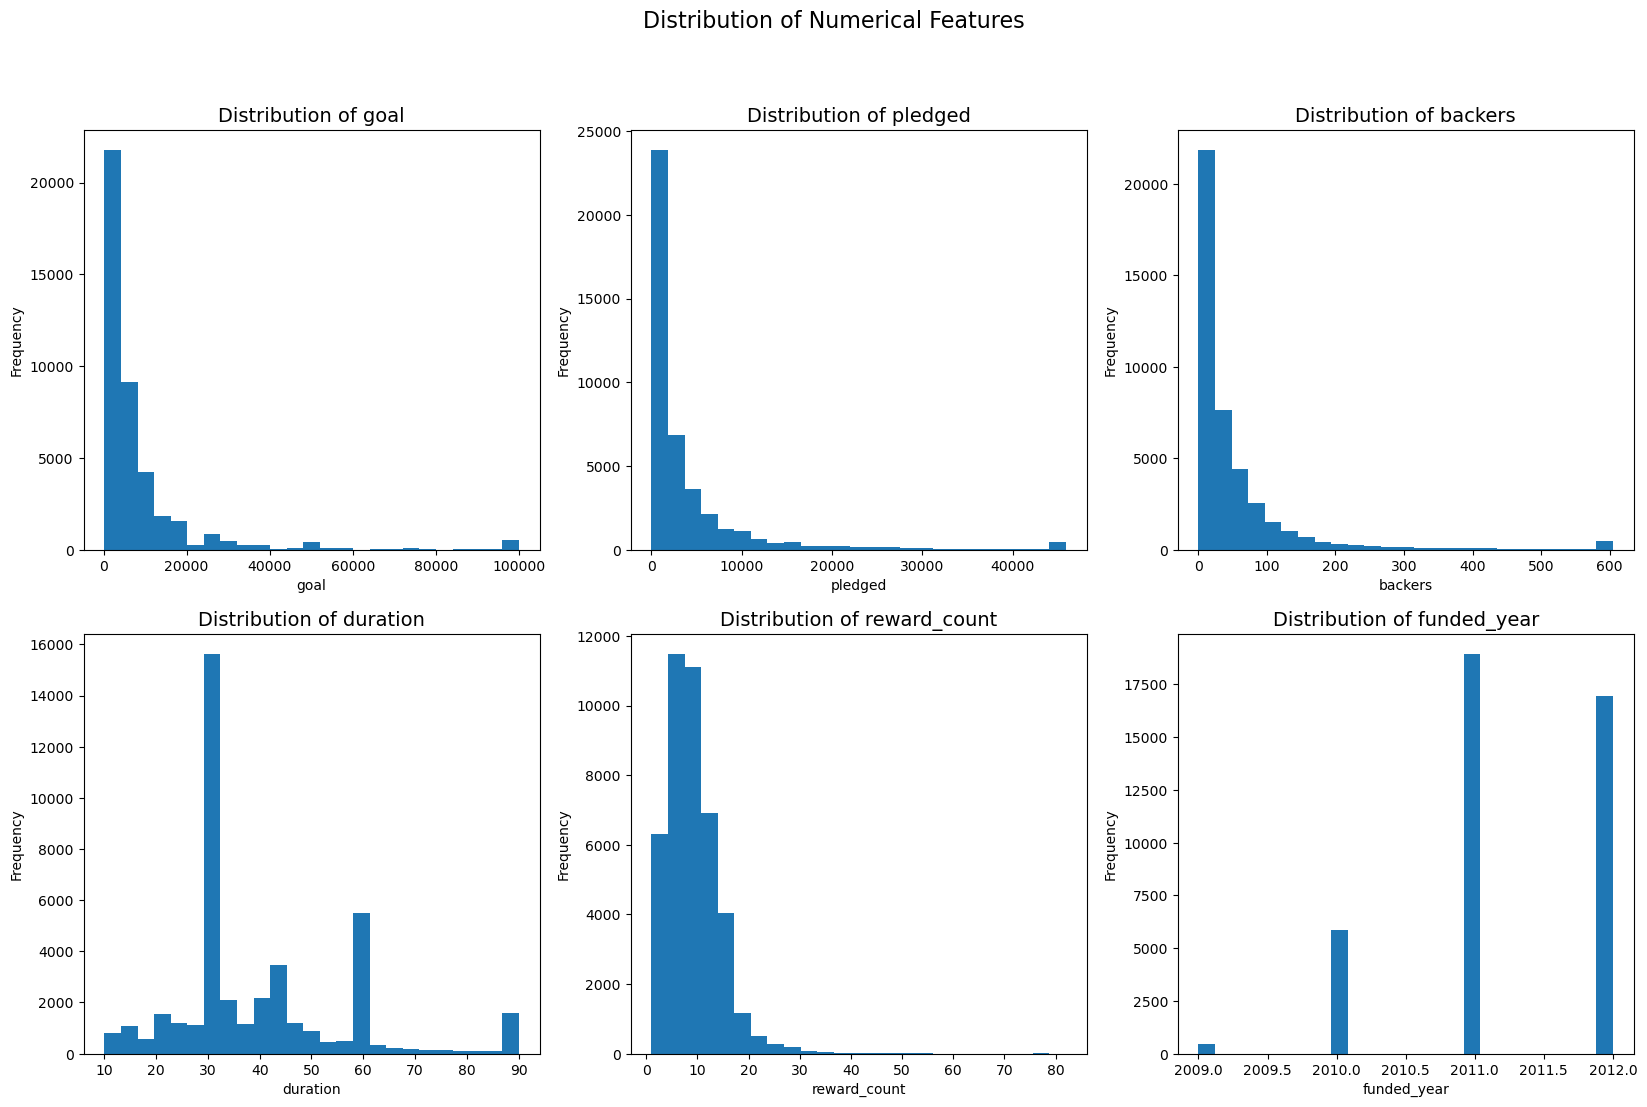

In [146]:
numerical_cols = ['goal', 'pledged', 'backers', 'duration', 'reward_count', 'funded_year']
# Histograms to show distributions
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=25, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

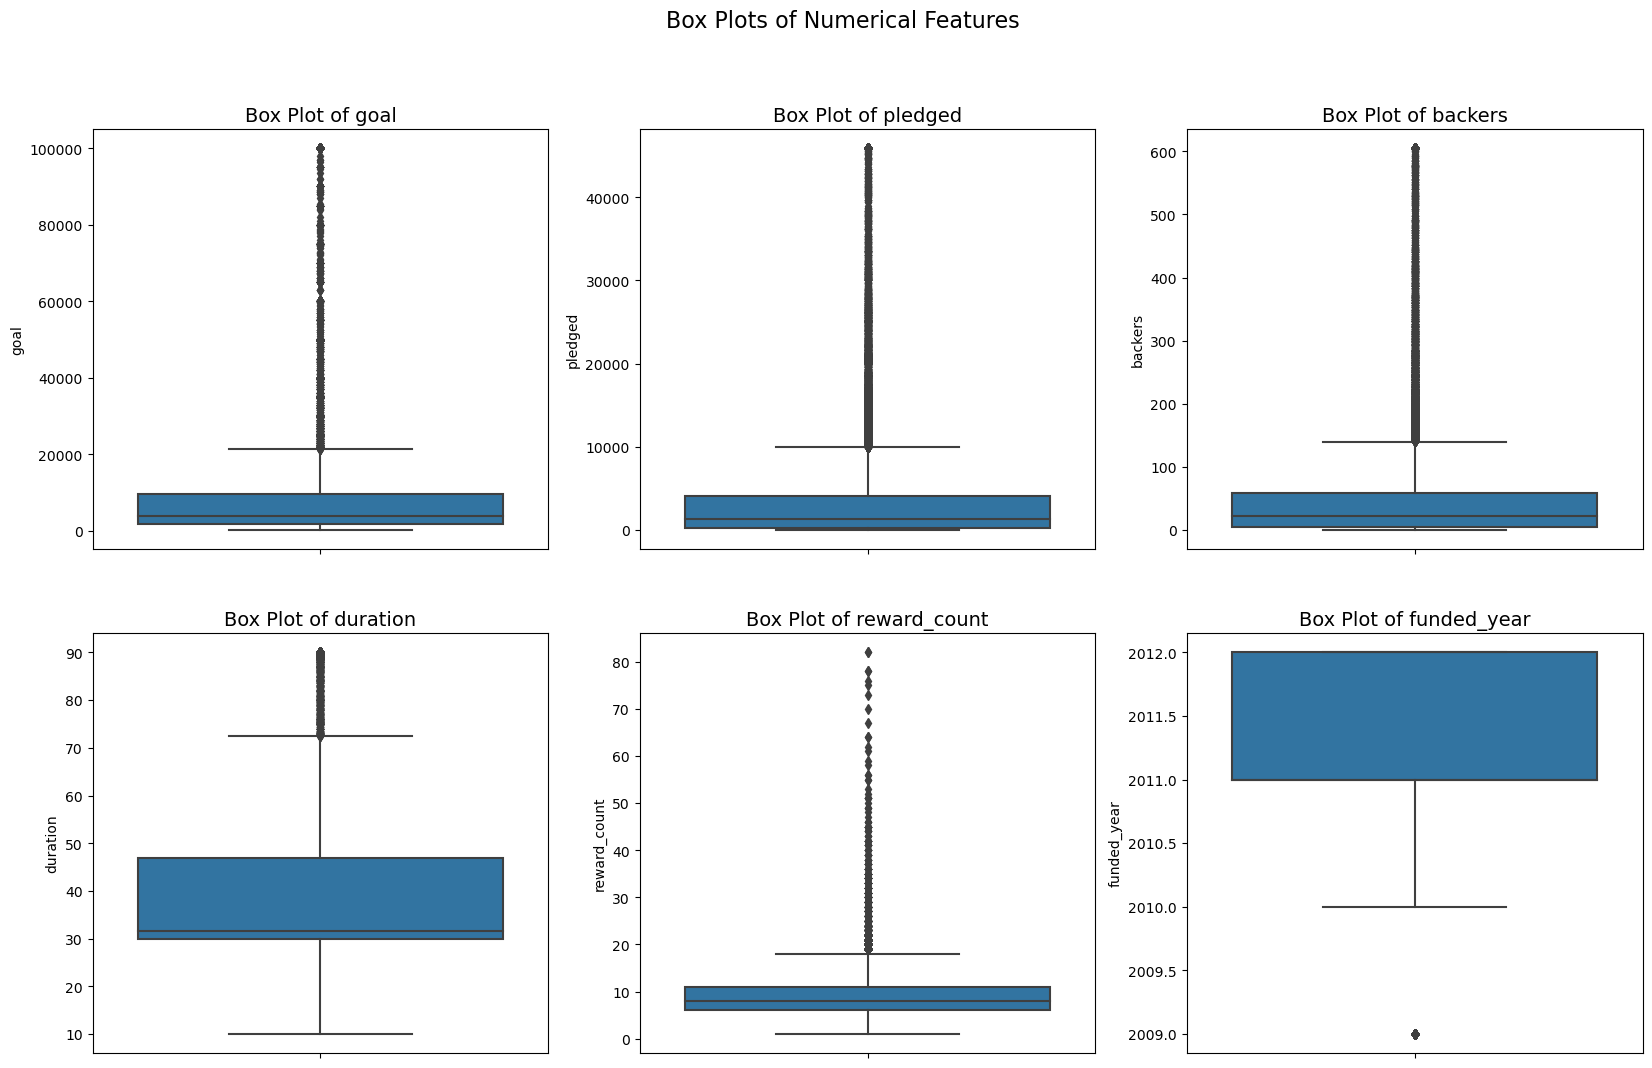

In [136]:
# Box plots to show distribution and outliers
plt.figure(figsize=(20, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col)

plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.show()

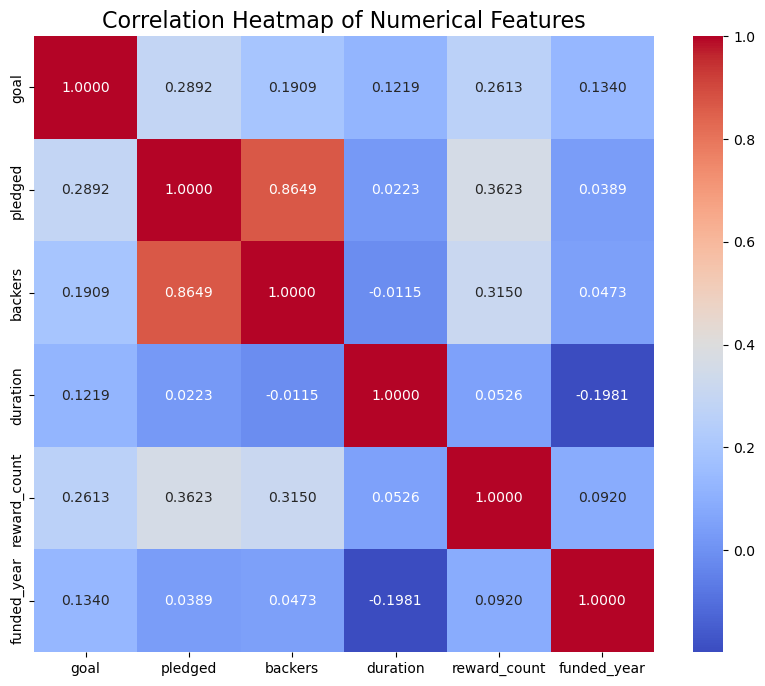

In [138]:
# Correlation Heatmap
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.4f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [139]:
# Category columns
category_cols = [col for col in df.columns if col.startswith('category_')]
category_cols

['category_Comics',
 'category_Dance',
 'category_Design',
 'category_Fashion',
 'category_Film & Video',
 'category_Film &amp; Video',
 'category_Food',
 'category_Games',
 'category_Music',
 'category_Photography',
 'category_Publishing',
 'category_Technology',
 'category_Theater']

In [140]:
category_counts = {}
for col in category_cols:
    category_name = col.replace('category_', '').title()
    count = df[col].sum()
    if count > 0:
        category_counts[category_name] = count

top_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:5]

top_categories

[('Film &Amp; Video', 11749),
 ('Music', 10391),
 ('Publishing', 4360),
 ('Theater', 2359),
 ('Design', 1637)]

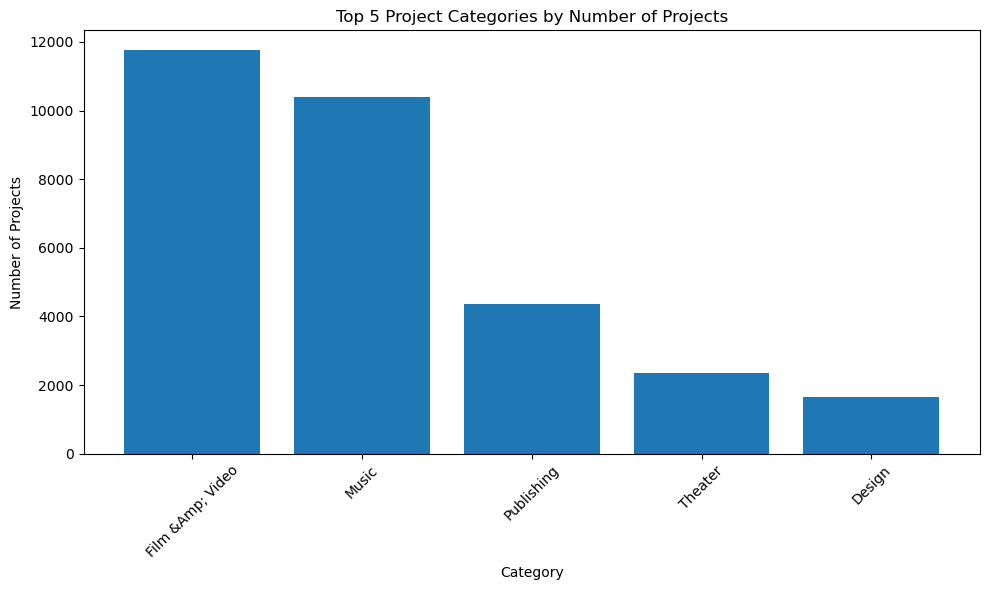

In [141]:
plt.figure(figsize=(10, 6))
categories = [cat for cat, count in top_categories]
counts = [count for cat, count in top_categories]

#print(categories, counts)

plt.bar(categories, counts)
plt.title('Top 5 Project Categories by Number of Projects')
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

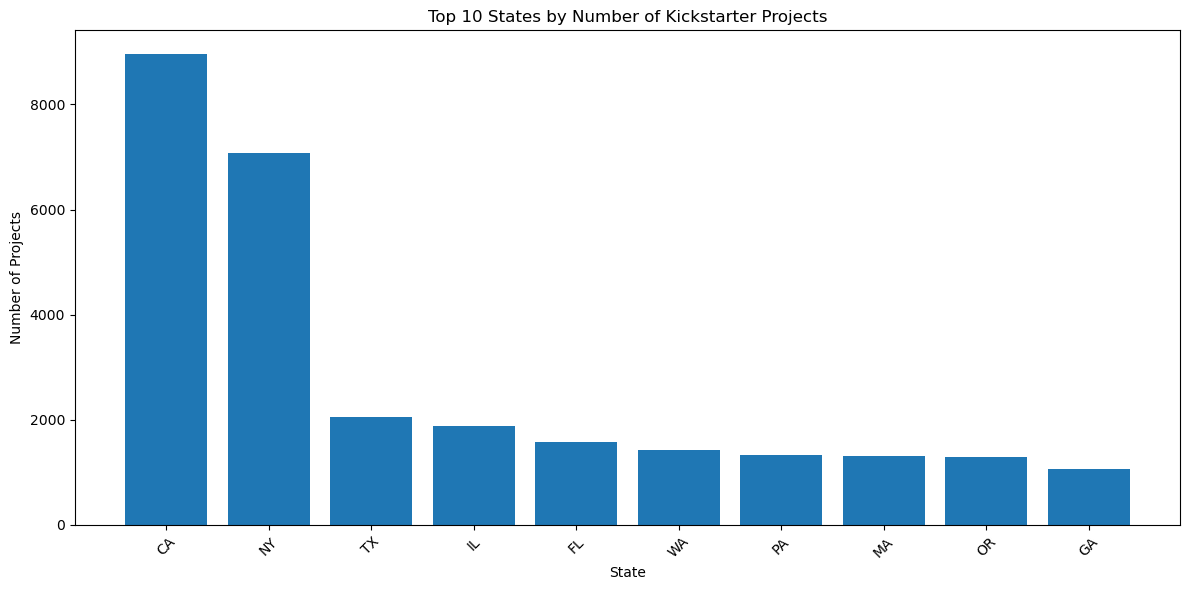

In [142]:
state_counts = {}
for column in df.columns:
    if column.startswith('state_'):
        state_name = column.replace('state_', '')
        count = df[column].sum()
        if count >= 10:  # only include states with 10+ projects
            state_counts[state_name] = count

# Sort states from high to low
sorted_states = sorted(state_counts.items(), key=lambda x: x[1], reverse=True)

top_10_states = sorted_states[:10]
states = [state for state, count in top_10_states]
counts = [count for state, count in top_10_states]

plt.figure(figsize=(12, 6))
plt.bar(states, counts)
plt.title('Top 10 States by Number of Kickstarter Projects')
plt.xlabel('State')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


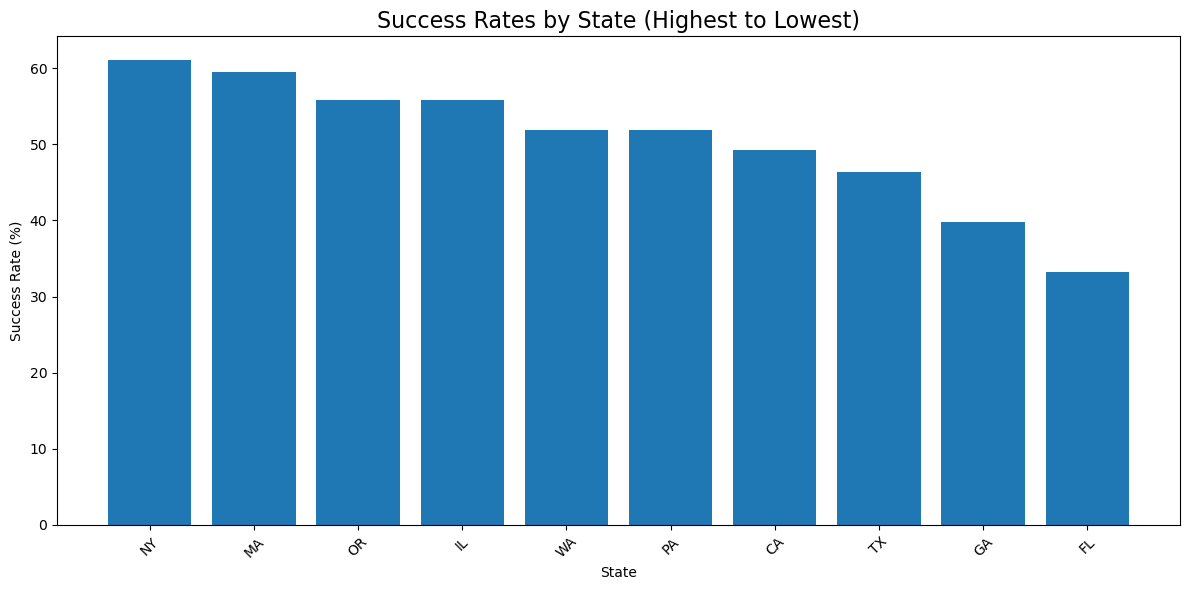

In [145]:
states = []
success_rates = []

for state, total_projects in top_10_states:
    column_name = f'state_{state}'
    state_data = df[df[column_name] == 1]
    successful = (state_data['pledged'] >= state_data['goal']).sum()
    success_rate = (successful / total_projects) * 100
    
    states.append(state)
    success_rates.append(success_rate)

state_df = pd.DataFrame({'State': states, 'Success_Rate': success_rates})
state_df = state_df.sort_values('Success_Rate', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_df['State'], state_df['Success_Rate'])
plt.title('Success Rates by State (Highest to Lowest)', fontsize=16)
plt.xlabel('State')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

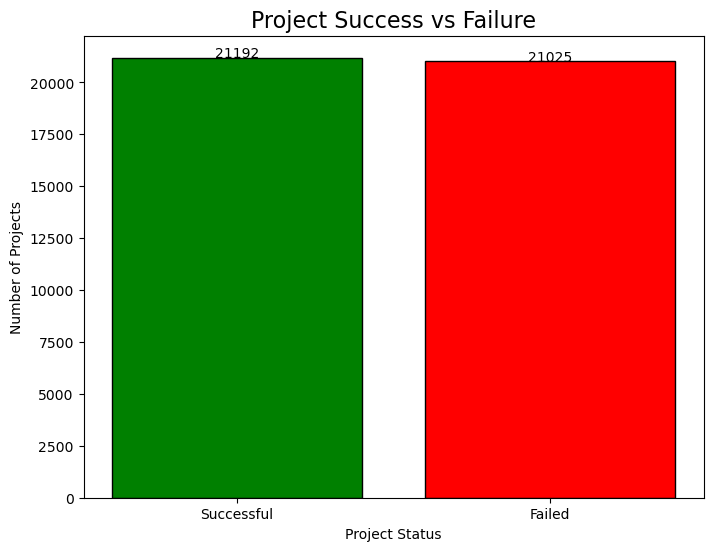

In [128]:
successful = df[df['pledged'] >= df['goal']]
failed = df[df['pledged'] < df['goal']]

plt.figure(figsize=(8, 6))
categories = ['Successful', 'Failed']
counts = [len(successful), len(failed)]

plt.bar(categories, counts, color=['green','red'], edgecolor='black')
plt.title('Project Success vs Failure', fontsize=16)
plt.xlabel('Project Status')
plt.ylabel('Number of Projects')

for i, count in enumerate(counts):
    plt.text(i, count, f'{count}', ha='center')

plt.show()

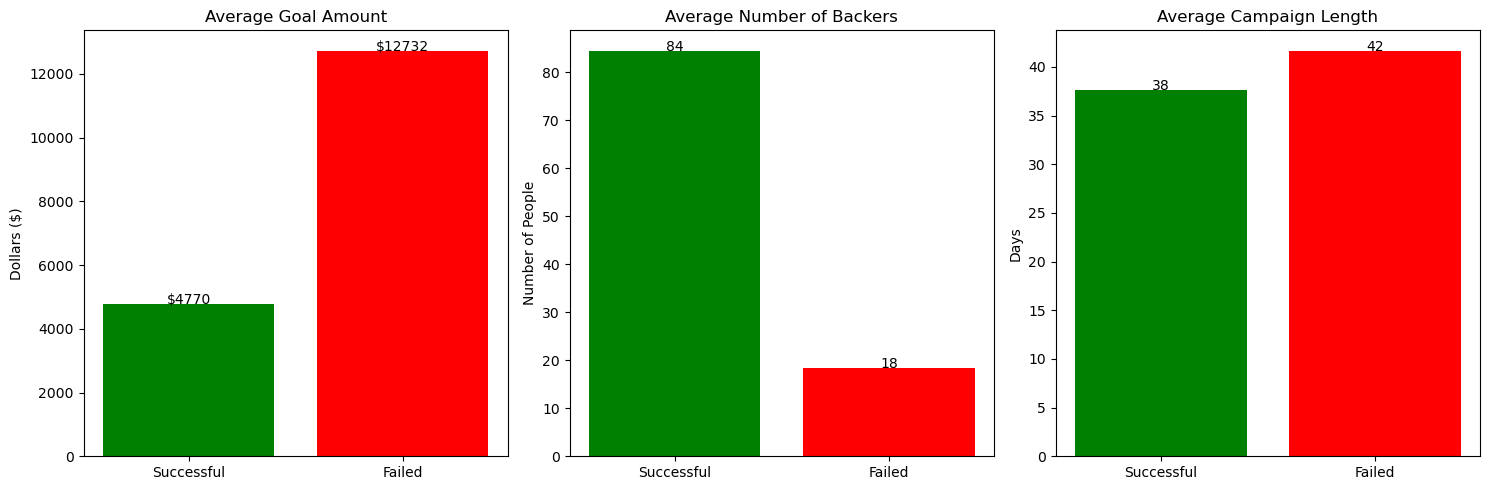

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(['Successful', 'Failed'], 
           [successful['goal'].mean(), failed['goal'].mean()], 
           color=['green', 'red'])
axes[0].set_title('Average Goal Amount')
axes[0].set_ylabel('Dollars ($)')
axes[0].text(0, successful['goal'].mean(), f"${successful['goal'].mean():.0f}", ha='center')
axes[0].text(1, failed['goal'].mean() , f"${failed['goal'].mean():.0f}", ha='center')

axes[1].bar(['Successful', 'Failed'], 
           [successful['backers'].mean(), failed['backers'].mean()], 
           color=['green', 'red'])
axes[1].set_title('Average Number of Backers')
axes[1].set_ylabel('Number of People')
axes[1].text(0, successful['backers'].mean(), f"{successful['backers'].mean():.0f}", ha='center')
axes[1].text(1, failed['backers'].mean(), f"{failed['backers'].mean():.0f}", ha='center')

axes[2].bar(['Successful', 'Failed'], 
           [successful['duration'].mean(), failed['duration'].mean()], 
           color=['green', 'red'])
axes[2].set_title('Average Campaign Length')
axes[2].set_ylabel('Days')
axes[2].text(0, successful['duration'].mean(), f"{successful['duration'].mean():.0f}", ha='center')
axes[2].text(1, failed['duration'].mean(), f"{failed['duration'].mean():.0f}", ha='center')

plt.tight_layout()
plt.show()

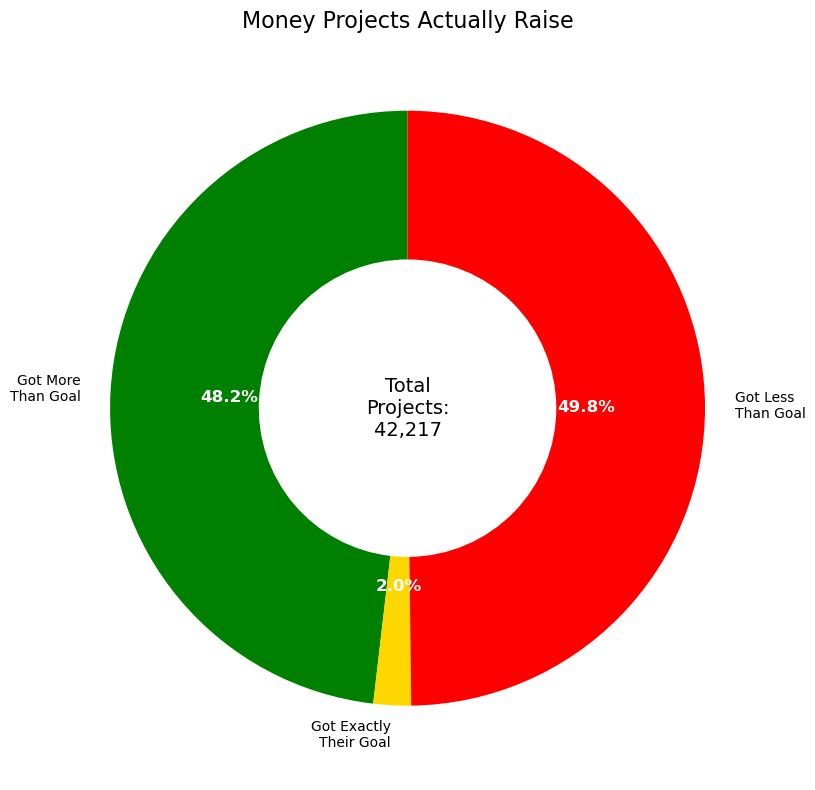

In [129]:
df['funding_ratio'] = df['pledged'] / df['goal']

got_more = len(df[df['funding_ratio'] > 1.0])
got_exactly = len(df[df['funding_ratio'] == 1.0])
got_less = len(df[df['funding_ratio'] < 1.0])

labels = ['Got More\nThan Goal', 'Got Exactly\nTheir Goal', 'Got Less\nThan Goal']
counts = [got_more, got_exactly, got_less]
colors = ['green', 'gold', 'red']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', 
                                  startangle=90, wedgeprops=dict(width=0.5))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Money Projects Actually Raise', fontsize=16)
total_projects = sum(counts)
plt.text(0, 0, f'Total\nProjects:\n{total_projects:,}', ha='center', va='center', 
         fontsize=14)

plt.tight_layout()
plt.show()